# Point72 MI Data - Analytics Case Study

### Introduction

Shown below is the problem statement of this case study. 

* You are given two types of data: 311 Service requests, and weather. The 311 Service requests dataset contains all the 311 calls from 2016 to 2018 with many different features including timestamps, location, service request descriptions, etc. Please describe the steps you take to ingest and process the data, what are the challenges and how you overcome them.
* Aggregate the 311 records in ways that best describes the characteristics of the inbound call patterns. Explain and visualize your findings. What are the implications you can infer from the patterns?
* The weather data contains the weather information from the weather stations in NYC from 2010 to 2018 in daily intervals. Describe and visualize your findings. (Please note this is NOT weather forecast)
* The final goal of this project is to predict the daily 311 inbound calls for the next 7 days 
* Use your insights from previous sections to build a predictive model of your choice – explain the assumptions of your model and why you picked it.
* What features are you using in your model and, how does your data exploration process help you decide which features you are incorporating in your model?
* Evaluate the impact of weather on the call volume, find patterns and define causal impact if there’s any. 
* Build a reasonable model framework, explain your model results, and justify the relationships identified in the model. Not necessary to dig into complex models.



### 311 requests

First, we'll look at the 311 calls dataset. This dataset in its raw form is quite large (7M rows, and 43 columns). To avoid running into memory issues, and keep runtimes reasonable, we can sample a chunk of the dataset instead of reading all of it. We can increase the sample size after the data exploration phase, if a need arises - such as if an analysis we're interested in requires more data points. 


To analyze the 311 Service requests dataset, we will follow a structured approach to ingest, process, and aggregate the data, focusing on understanding the inbound call patterns. Here's an outline of the steps we'll take, the potential challenges we might encounter, and how we'll overcome them, followed by an analysis and visualization of our findings. The detailed steps described below are standard steps for data analysis, like we'd find in any reference material. 

#### Step 1: Data Ingestion
**Action**: Load the dataset using Pandas.\
**Challenge**: The file size is very large, and leads to memory issues.\
**Solution**: Use chunking and randomly sample data points so we have span all the timeperiods.

#### Step 2: Preliminary Exploration
**Action**: Perform an initial exploration to understand the dataset's structure, including the number of records, features, missing values, and data types.\
**Challenge**: Identifying relevant features and handling missing or inconsistent data.\
**Solution**: Use descriptive statistics and visualization tools to assess data quality, and apply imputation or removal of missing data as appropriate.

#### Step 3: Data Cleaning
**Action**: Clean the dataset by handling missing values, correcting data types (e.g., converting timestamps to datetime objects), and removing duplicates.\
**Challenge**: Ensuring accurate data type conversions and dealing with outliers.\
**Solution**: Validate conversions through sample checks and use statistical methods to identify and handle outliers.

#### Step 4: Data Aggregation
**Action**: Aggregate the data to identify patterns, such as call volume over time, most common service requests, and geographic distribution of calls.\
**Challenge**: Choosing the right level of aggregation to reveal meaningful patterns without oversimplification.\
**Solution**: Experiment with different aggregation levels (e.g., daily, monthly, by neighborhood) and metrics (e.g., count, mean) to find the most insightful views.

#### Step 5: Analysis and Visualization
**Action**: Analyze aggregated data to uncover trends, seasonal patterns, and anomalies. Visualize findings using charts and maps.\
**Challenge**: Making complex data understandable and visually engaging.\
**Solution**: Use a combination of visualization techniques, such as time series plots, bar charts, heatmaps, and geographic maps.

#### Step 6: Implications and Insights
**Action**: Interpret patterns to infer implications for city management, resource allocation, and policy making.\
**Challenge**: Translating data patterns into actionable insights.\
**Solution**: Combine data analysis with domain knowledge to provide recommendations or insights.
Let's start by ingesting the dataset and performing a preliminary exploration to understand its structure. We'll look at the number of records, features, and get a sense of the data we're dealing with. Then, we'll proceed with the subsequent steps based on our initial findings.



We'll jump right into it by importing libraries. Then we'll load and examine the data to understand its structure and contents. This examination will allow us to identify the best ways to aggregate the 311 records and describe the characteristics of the inbound call patterns. Let's start by loading the data and taking a look at the first few rows.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from io import StringIO
import random
import plotly.express as px

font = {'size'   : 18}
plt.rc('font', **font)

In [2]:
filename = '311-2016-2018.csv'

n = sum(1 for line in open(filename)) - 1 # number of rows in the original dataset
s = 1000000 # we want to sample 500k rows, randomly
skip = sorted(random.sample(range(1,n+1),n-s)) # the sampling step

requests = pd.read_csv(filename, skiprows=skip, on_bad_lines='skip')
requests['Created Date'] = pd.to_datetime(requests['Created Date'])
requests.head()


Unique Key        Created Date             Closed Date Agency  \
0    38237855 2018-01-17 22:42:00  01/20/2018 10:02:00 PM   DSNY   
1    38237869 2018-01-17 16:10:25  01/25/2018 05:01:02 PM    DOT   
2    38237875 2018-01-17 20:59:39  04/09/2018 04:00:34 PM    DPR   
3    38237880 2018-01-17 06:14:00  01/19/2018 10:52:00 PM   DSNY   
4    38237911 2018-01-16 14:28:42  01/17/2018 10:34:00 AM    DOT   

                          Agency Name                       Complaint Type  \
0            Department of Sanitation  Request Large Bulky Item Collection   
1        Department of Transportation                   Sidewalk Condition   
2  Department of Parks and Recreation                     New Tree Request   
3            Department of Sanitation  Request Large Bulky Item Collection   
4        Department of Transportation                     Street Condition   

                            Descriptor Location Type Incident Zip  \
0  Request Large Bulky Item Collection      Sidewalk      11361.0   
1                   Sidewalk Violation      Sidewalk      11103.0   
2                      For One Address        Street      10456.0   
3  Request Large Bulky Item Collection      Sidewalk      11365.0   
4                              Pothole           NaN      11434.0   

        Incident Address  ... Taxi Company Borough Taxi Pick Up Location  \
0         204-36 47 ROAD  ...                  NaN                   NaN   
1        25-92 45 STREET  ...                  NaN                   NaN   
2     1069 MORRIS AVENUE  ...                  NaN                   NaN   
3  56-43A UTOPIA PARKWAY  ...                  NaN                   NaN   
4                    NaN  ...                  NaN                   NaN   

  Bridge Highway Name Bridge Highway Direction Road Ramp  \
0                 NaN                      NaN       NaN   
1                 NaN                      NaN       NaN   
2                 NaN                      NaN       NaN   
3                 NaN                      NaN       NaN   
4                 NaN                      NaN       NaN   

  Bridge Highway Segment   Latitude  Longitude  \
0                    NaN  40.754075 -73.775594   
1                    NaN  40.764037 -73.909373   
2                    NaN  40.829992 -73.916022   
3                    NaN  40.742214 -73.792707   
4                    NaN  40.670495 -73.783586   

                                   Location Created Year  
0   (40.75407455058778, -73.77559379608053)       2018.0  
1  (40.764037012670705, -73.90937295482006)       2018.0  
2   (40.82999240822301, -73.91602229653515)       2018.0  
3    (40.74221358931228, -73.7927067330179)       2018.0  
4    (40.6704951254575, -73.78358581710555)       2018.0  

[5 rows x 42 columns]

In [3]:
requests.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location', 'Created Year'],
      dtype='object')

The dataset contains various columns, including identifiers, dates, agency details, complaint types, descriptors, location information, and more. Here's a brief overview based on the first few rows:

* Unique Key: A unique identifier for each record.
* Created Date: The date and time when the complaint was created.
* Closed Date: The date and time when the complaint was closed.
* Agency: The acronym of the agency responsible for addressing the complaint.
* Agency Name: The full name of the agency.
* Complaint Type: The type of complaint.
* Descriptor: More detailed information about the complaint.
* Location Type: The type of location where the incident was reported.
* Incident Zip: The ZIP code where the incident occurred.
* Latitude, Longitude, Location: Geographic details of the incident location.
* Created Year and Date: The year and date when the complaint was created, respectively.

### Exploratory data analysis

To describe the characteristics of the inbound call patterns, we can aggregate the data in several ways:

1. Time Trends: Analyze complaint volume over time (daily, monthly, yearly).
2. Complaint Type Distribution: Identify the most common types of complaints.
3. Agency Response: Examine which agencies handle the most complaints.
4. Location Analysis: Determine areas with high complaint volumes.
5. Resolution Time: Calculate the time taken to close complaints.

For a comprehensive analysis, we'll start by exploring each of these aggregations. 

#### Yearly, monthly trends

Let's begin with the time trends to see how complaint volumes have changed over time. We'll look at the yearly and monthly complaint volumes.

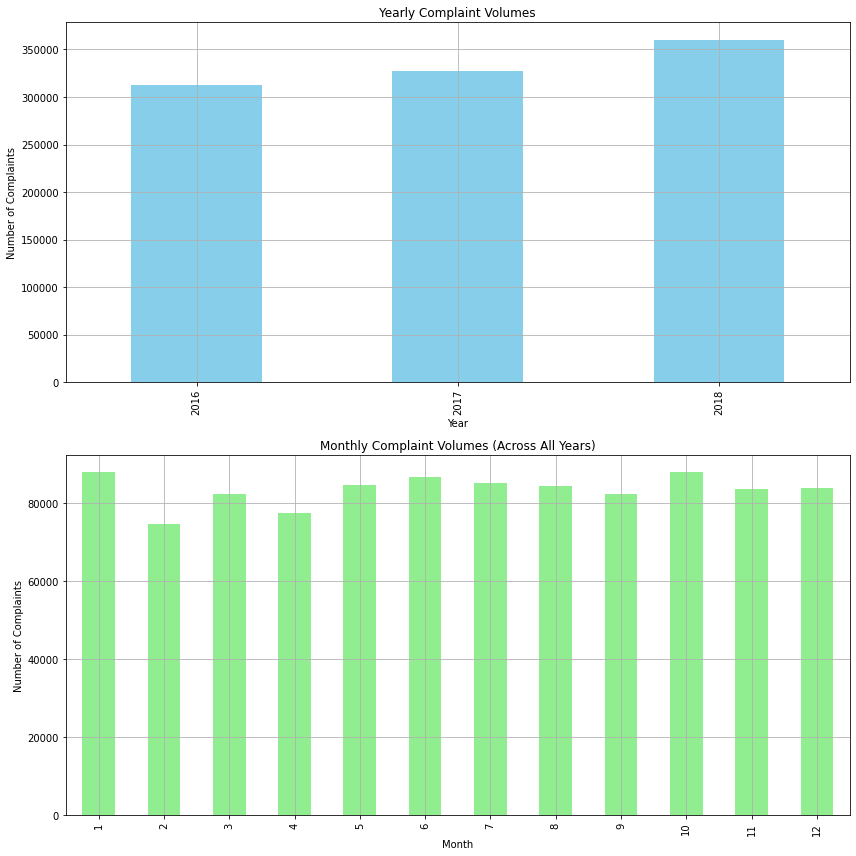

In [4]:
# Extract year and month for aggregation
requests['Year'] = requests['Created Date'].dt.year
requests['Month'] = requests['Created Date'].dt.month

# Yearly complaint volumes
yearly_volume = requests.groupby('Year').size()

# Monthly complaint volumes (across all years)
monthly_volume = requests.groupby('Month').size()

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Yearly Volumes
yearly_volume.plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Yearly Complaint Volumes')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Complaints')
ax[0].grid()

# Monthly Volumes
monthly_volume.plot(kind='bar', ax=ax[1], color='lightgreen')
ax[1].set_title('Monthly Complaint Volumes (Across All Years)')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Number of Complaints')
ax[1].grid()

plt.tight_layout()
plt.show()


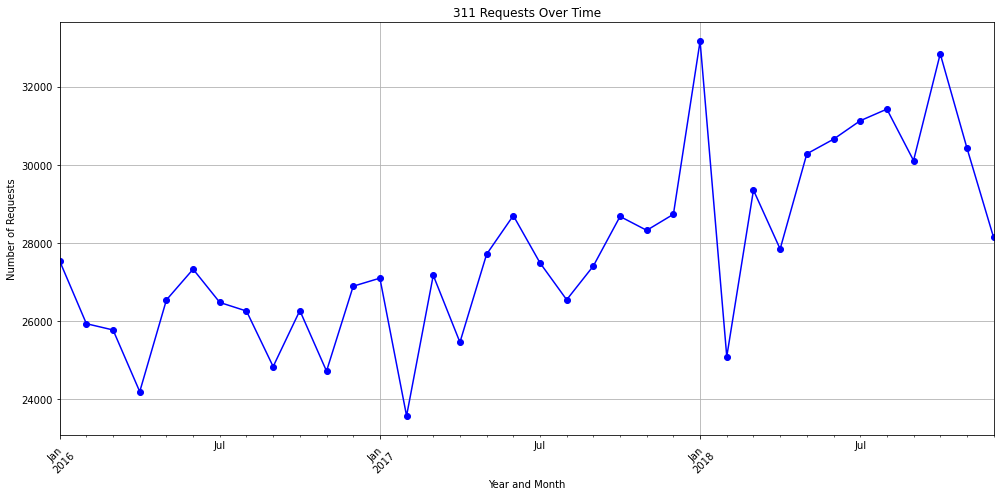

In [5]:
# Extract year and month for grouping purposes
requests['Year-Month'] = requests['Created Date'].dt.to_period('M')

# Group by the new 'Year-Month' column to see the number of requests over time
requests_by_month = requests.groupby('Year-Month').size()

# Plotting
plt.figure(figsize=(14, 7))
requests_by_month.plot(kind='line', color='blue', marker='o')
plt.title('311 Requests Over Time')
plt.xlabel('Year and Month')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


The visualizations provide insights into the inbound call patterns based on the 311 records:

1. **Yearly Complaint Volumes**: The bar chart shows the number of complaints for each year represented in the dataset. It looks like the number of complaints have increased over the 3 years. 

2. **Monthly Complaint Volumes (Across All Years)**: The second bar chart aggregates complaint volumes by month, combining data from all years. Not really seeing any major trends here - this is somewhat surprising since I expected seasonal trends. 

We can also do this weekly. 

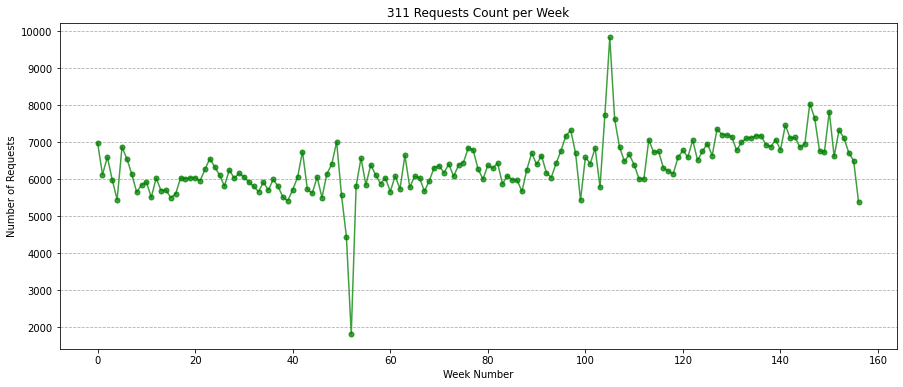

In [6]:
# Extract the week of the year from the 'Request Date'
requests['Request Week'] = requests['Created Date'].dt.isocalendar().week

# Group by year as well to ensure accuracy across years
requests['Request Year'] = requests['Created Date'].dt.year

# Aggregate the data by year and week
weekly_requests = requests.groupby(['Request Year', 'Request Week']).size()

# Reset index to have a flat structure for easier plotting
weekly_requests_reset = weekly_requests.reset_index(name='Count')

# Plotting the weekly request counts
plt.figure(figsize=(15, 6))
plt.plot(weekly_requests_reset.index, weekly_requests_reset['Count'], marker='o', linestyle='-', markersize=5, alpha=0.75, color='green')
plt.title('311 Requests Count per Week')
plt.xlabel('Week Number')
plt.ylabel('Number of Requests')
plt.grid(axis='y', linestyle='--')

plt.show()




#### Complaint Type Distribution
We'll next look at the distribution of complaint types. This will help us understand the most common issues reported by residents. After that, we can explore the resolution times to gauge the efficiency of the agencies' responses.


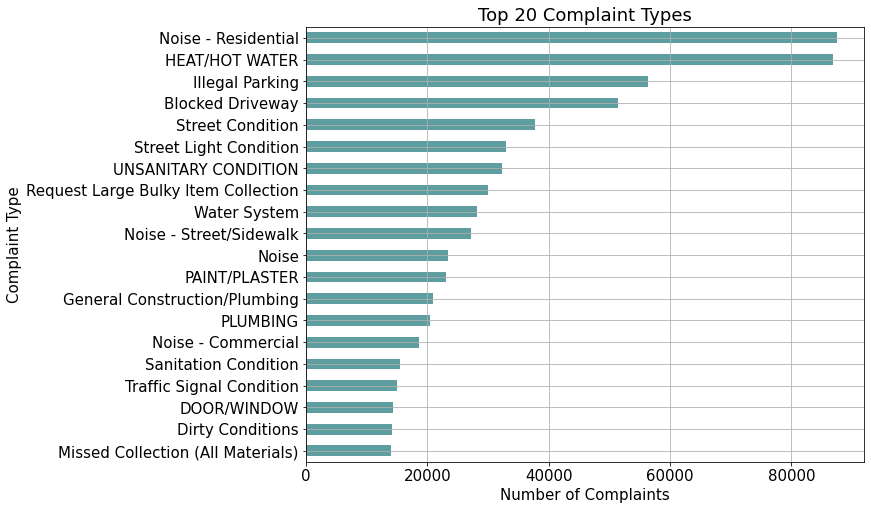

In [7]:
complaint_type_distribution = requests['Complaint Type'].value_counts().head(20)

# Plotting
font = {'size'   : 15}
plt.rc('font', **font)

plt.figure(figsize=(10, 8))
complaint_type_distribution.plot(kind='barh', color='cadetblue')
plt.title('Top 20 Complaint Types')
plt.xlabel('Number of Complaints')
plt.ylabel('Complaint Type')
plt.gca().invert_yaxis()  # To display the highest number at the top
plt.grid()
plt.show()


The bar chart displays the top 20 complaint types based on their frequencies. This visualization helps us identify the most common issues that residents' report. As we can see, **Noise - Residential** and **Heat/Hot Water** are the most frequent types of requests. 

#### Agency Name Distribution
We'll next look at the distribution of frequency of complaints by agency. 


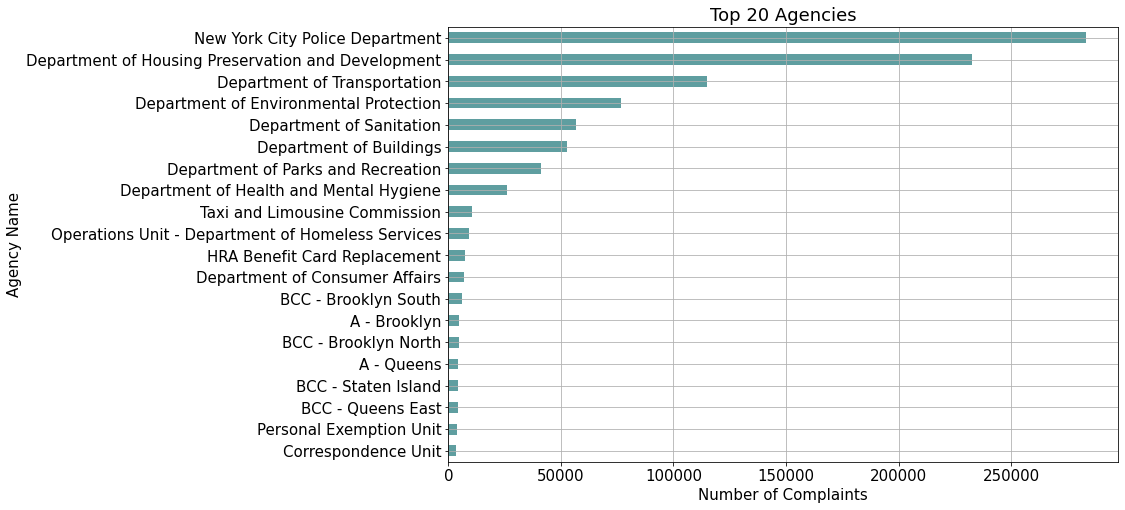

In [8]:
agency_name_distribution = requests['Agency Name'].value_counts().head(20)

plt.figure(figsize=(12, 8))
agency_name_distribution.plot(kind='barh', color='cadetblue')
plt.title('Top 20 Agencies')
plt.xlabel('Number of Complaints')
plt.ylabel('Agency Name')
plt.gca().invert_yaxis()  # To display the highest number at the top
plt.grid()
plt.show()

We see that NYCPD and Department of Housing Preservation and Development receive the highest number of complaints. 

#### Which Borough has the highest requests? 


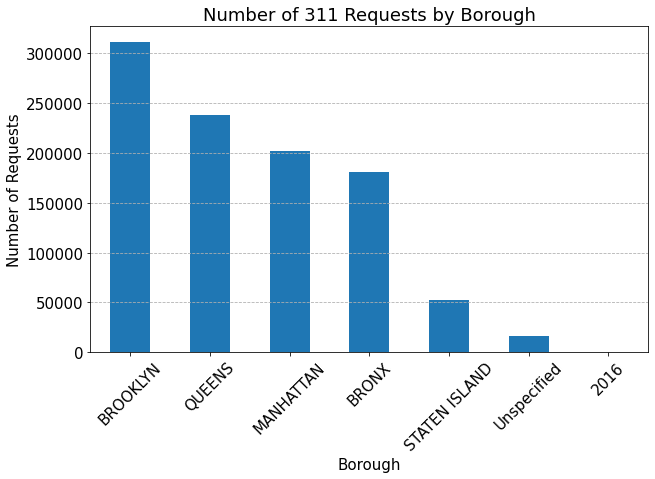

In [9]:
import matplotlib.pyplot as plt

# Count the number of complaints/requests from different boroughs
borough_counts = requests['Borough'].value_counts()

# Plotting the distribution of complaints/requests across different boroughs
plt.figure(figsize=(10, 6))
borough_counts.plot(kind='bar')
plt.title('Number of 311 Requests by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

plt.show()


Given that the different boroughs have different populations, we can get the per capita complaint frequency by normalizing the above counts by the population. The population of different Boroughs from a recent census is as follows -

Brooklyn: 2.6 million
Queens: 2.3 million
Manhattan: 1.6 million
The Bronx: 1.4 million
Staten Island: 0.5 million

Next, we'll calculate the per capita complaints/requests for each borough by dividing the total number of complaints/requests from each borough by its population.



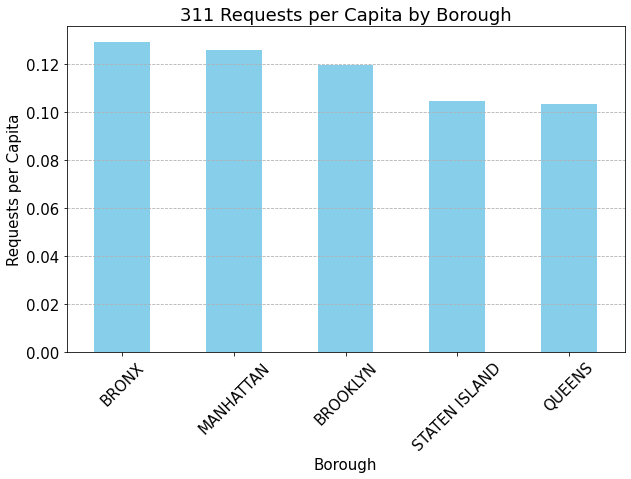

In [10]:
# Correcting the calculation for per capita requests

# Population data for each borough
populations = {
    'BROOKLYN': 2.6e6,
    'QUEENS': 2.3e6,
    'MANHATTAN': 1.6e6,
    'BRONX': 1.4e6,
    'STATEN ISLAND': 0.5e6
}


# First, ensure we correctly aggregate the number of requests per borough according to the updated population keys
borough_counts_corrected = requests['Borough'].value_counts()

# Calculate the per capita complaints/requests for each borough using the corrected aggregation
per_capita_requests_corrected = {borough: borough_counts_corrected[borough] / populations[borough] for borough in populations.keys()}

per_capita_requests_corrected_df = pd.Series(per_capita_requests_corrected).sort_values(ascending=False)

# Plotting the per capita complaints/requests by borough
plt.figure(figsize=(10, 6))
per_capita_requests_corrected_df.plot(kind='bar', color='skyblue')
plt.title('311 Requests per Capita by Borough')
plt.xlabel('Borough')
plt.ylabel('Requests per Capita')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

plt.show()


#### Geographical locations of requests 
Since we have the latitude, longitude of the reported incident, we can plot the locations and density on a map of New York (mostly because it's cool!). 

In [11]:
requests_lat_long = requests.copy()

requests_lat_long['Latitude'] = np.round(requests_lat_long['Latitude'],2)
requests_lat_long['Longitude'] = np.round(requests_lat_long['Longitude'],2)

requests_lat_long_agg = requests_lat_long.groupby(['Latitude','Longitude']).size().reset_index(name='counts')
requests_lat_long_agg['Density'] = requests_lat_long_agg['counts']/requests_lat_long_agg['counts'].sum()

color_scale = [(0, 'orange'), (1,'red')]

fig = px.density_mapbox(requests_lat_long_agg, 
                        lat="Latitude", 
                        lon="Longitude", 
                        z="Density",
                        color_continuous_scale='viridis',
                        zoom=9, 
                        radius=26,
                        height=800,
                        width=900)

fig.update_layout(mapbox_style="open-street-map")
fig.show()

Next, let's explore the resolution times for complaints to understand how quickly agencies respond to and resolve these issues. We'll calculate the resolution time as the difference between the 'Closed Date' and 'Created Date' and then analyze the average resolution time by complaint type. Since we have a large number of different types of complaints, we will look at the 20 complaints that have the fastest and slowest resolution times. 

In [12]:
requests['Created Date'] = pd.to_datetime(requests['Created Date'], errors='coerce')
requests['Closed Date'] = pd.to_datetime(requests['Closed Date'], errors='coerce')

# Calculate resolution time in days
requests['Resolution Time'] = (requests['Closed Date'] - requests['Created Date']).dt.total_seconds() / (60 * 60 * 24)

# Group by 'Complaint Type' and calculate average resolution time
average_resolution_time = requests.groupby('Complaint Type')['Resolution Time'].mean().reset_index()

average_resolution_time.sort_values(by='Resolution Time', ascending=False)



Complaint Type  Resolution Time
233        Unsanitary Condition       856.811407
105              Found Property       600.863376
108                     General       527.235428
147                  Mosquitoes       512.553917
68                     Day Care       483.078656
..                          ...              ...
225                   Trans Fat              NaN
230              Unlicensed Dog              NaN
231  Unsanitary Animal Facility              NaN
236            VACANT APARTMENT              NaN
244                Window Guard              NaN

[247 rows x 2 columns]

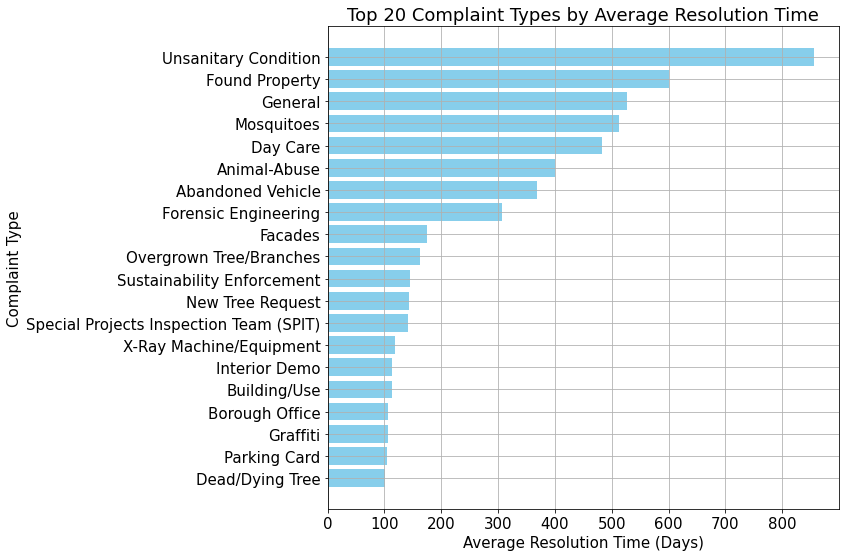

In [13]:
# Since the list is long, let's take the top 20 complaint types for a clearer visualization
top_20_average_resolution_time = average_resolution_time.nlargest(20, 'Resolution Time')

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(top_20_average_resolution_time['Complaint Type'], top_20_average_resolution_time['Resolution Time'], color='skyblue')
plt.xlabel('Average Resolution Time (Days)')
plt.ylabel('Complaint Type')
plt.title('Top 20 Complaint Types by Average Resolution Time')
plt.gca().invert_yaxis()  # To display the longest resolution time at the top
plt.tight_layout()
plt.grid()
plt.show()


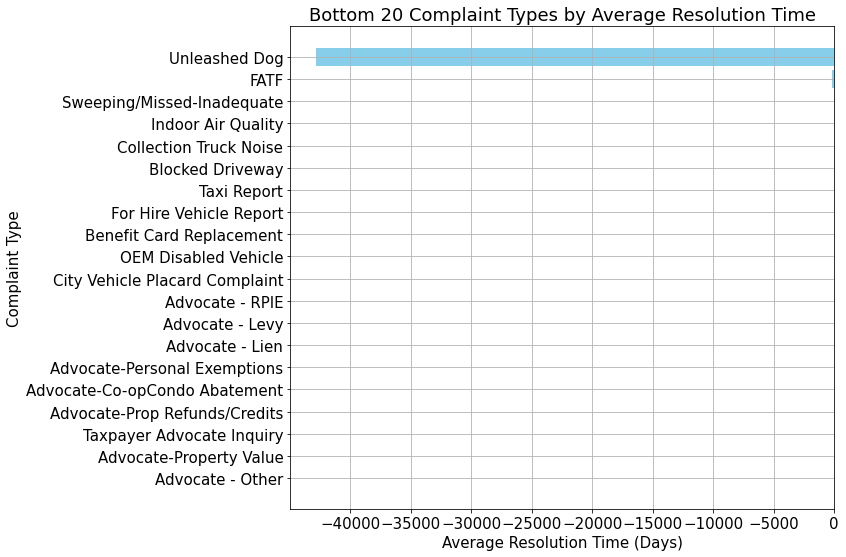

In [14]:
# Since the list is long, let's take the top 20 complaint types for a clearer visualization
bottom_20_average_resolution_time = average_resolution_time.dropna().nsmallest(20, 'Resolution Time')

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(bottom_20_average_resolution_time['Complaint Type'], bottom_20_average_resolution_time['Resolution Time'], color='skyblue')
plt.xlabel('Average Resolution Time (Days)')
plt.ylabel('Complaint Type')
plt.title('Bottom 20 Complaint Types by Average Resolution Time')
plt.gca().invert_yaxis()  # To display the longest resolution time at the top
plt.tight_layout()
plt.grid()
plt.show()


So we're seeing some negative resolution times, which is an error in the data. To address this issue of negative resolution times, which likely represent errors in the data (such as closed dates recorded before the created dates), we will first filter out these erroneous records. After correcting for negative resolution times, we'll re-analyze the average resolution times by complaint type, ensuring more accurate insights.

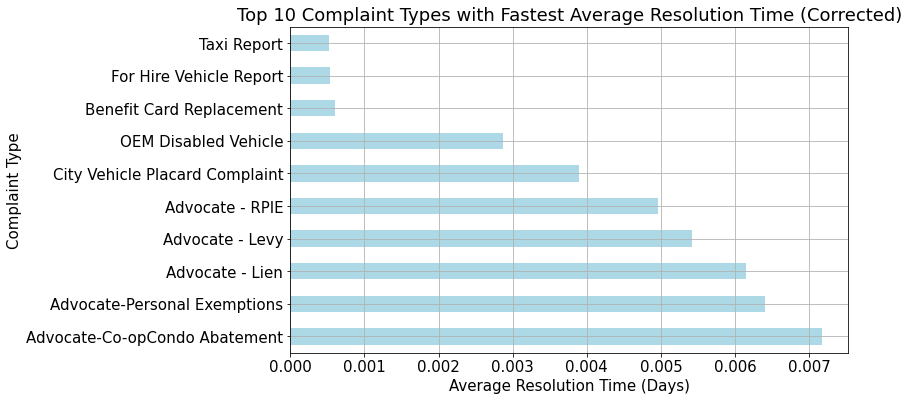

In [15]:
# Filter out records with negative resolution times
data_corrected = requests[requests['Resolution Time'] >= 0]

# Re-calculate the average resolution time by complaint type, focusing on corrected data
average_resolution_time_corrected = data_corrected.groupby('Complaint Type')['Resolution Time'].mean().sort_values(ascending=True).head(10)

# Plotting the corrected average resolution times
plt.figure(figsize=(10, 6))
average_resolution_time_corrected.plot(kind='barh', color='lightblue')
plt.title('Top 10 Complaint Types with Fastest Average Resolution Time (Corrected)')
plt.xlabel('Average Resolution Time (Days)')
plt.ylabel('Complaint Type')
plt.gca().invert_yaxis()  # To display the lowest number at the top
plt.grid()
plt.show()



Okay that looks much better. Although we are seeing really quick resolution times (a few seconds), this is likely because some of these were marked as resolved on the initial phone call itself.

## Weather Data
Now we'll jump into the weather data and start exploring this dataset. 

In [16]:
weather_data = pd.read_csv('weather_NY_2010_2018Nov.csv')
weather_data['Precipitation'] = weather_data['Percipitation']

weather_data['dt'] = pd.to_datetime(weather_data.Year.astype(str) + '/' + weather_data.Month.astype(str) + '/' + weather_data.Day.astype(str))
weather_data


USAF   WBAN               StationName State  Latitude  Longitude  \
0       726228  94740  ADIRONDACK REGIONAL ARPT    NY    44.385    -74.207   
1       726228  94740  ADIRONDACK REGIONAL ARPT    NY    44.385    -74.207   
2       726228  94740  ADIRONDACK REGIONAL ARPT    NY    44.385    -74.207   
3       726228  94740  ADIRONDACK REGIONAL ARPT    NY    44.385    -74.207   
4       726228  94740  ADIRONDACK REGIONAL ARPT    NY    44.385    -74.207   
...        ...    ...                       ...   ...       ...        ...   
160770  743700  14715  WHEELER-SACK AAF AIRPORT    NY    44.050    -75.733   
160771  743700  14715  WHEELER-SACK AAF AIRPORT    NY    44.050    -75.733   
160772  743700  14715  WHEELER-SACK AAF AIRPORT    NY    44.050    -75.733   
160773  743700  14715  WHEELER-SACK AAF AIRPORT    NY    44.050    -75.733   
160774  743700  14715  WHEELER-SACK AAF AIRPORT    NY    44.050    -75.733   

        MeanTemp  MinTemp  MaxTemp  DewPoint  ...  MaxSustainedWind  Gust  \
0           27.6     24.8     30.9      25.0  ...               6.0   NaN   
1           -3.2    -20.9     17.1      -9.6  ...               9.9   NaN   
2           20.9     17.1     24.1      15.1  ...              12.0  19.0   
3           13.8      5.0     19.9       8.5  ...               8.0  15.9   
4            6.3     -8.0     19.0       1.9  ...               5.1   NaN   
...          ...      ...      ...       ...  ...               ...   ...   
160770      78.4     68.5     90.9      71.6  ...              13.0  19.0   
160771      75.3     66.2     82.0      71.4  ...               9.9  17.1   
160772      63.0     51.4     73.2      54.0  ...               8.0   NaN   
160773      56.4     49.5     73.2      45.7  ...              14.0  20.0   
160774      51.3     40.6     62.6      43.4  ...               8.9   NaN   

        Rain  SnowDepth  SnowIce  Year  Month  Day  Precipitation         dt  
0          0        NaN        1  2010      1    1           0.07 2010-01-01  
1          0        NaN        1  2010      1   10           0.00 2010-01-10  
2          0        NaN        1  2010      1   11           0.00 2010-01-11  
3          0        NaN        1  2010      1   12            NaN 2010-01-12  
4          0        NaN        1  2010      1   13           0.00 2010-01-13  
...      ...        ...      ...   ...    ...  ...            ...        ...  
160770     0        NaN        0  2018      9    5           0.00 2018-09-05  
160771     1        NaN        0  2018      9    6           0.04 2018-09-06  
160772     0        NaN        0  2018      9    7           0.00 2018-09-07  
160773     0        NaN        0  2018      9    8           0.00 2018-09-08  
160774     0        NaN        0  2018      9    9           0.00 2018-09-09  

[160775 rows x 22 columns]

The weather dataset contains 160,775 entries, with 20 columns detailing weather observations from New York between 2010 and November 2018. Here's a brief overview of some key columns:

* USAF, WBAN: Identifiers for the weather stations.
* StationName: The name of the weather station.
* State: The state of the weather station (all NY in this dataset).
* Latitude, Longitude: Geographic coordinates of the weather station.
* MeanTemp: The mean temperature for the day.
* MinTemp, MaxTemp: The minimum and maximum temperatures for the day.
* DewPoint: The dew point temperature.
* Percipitation: The amount of precipitation.
* WindSpeed, MaxSustainedWind: Wind speed and maximum sustained wind speed.
* Gust: Wind gust speed.
* Rain, SnowIce: Indicators for the presence of rain or snow/ice.
* SnowDepth: The depth of snow.
* Year, Month, Day: The date of the observation.

For basic exploratory data analysis with plots, we could look into the following:

* Temperature Trends: Analyze how temperatures (mean, min, max) have changed over the years.
* Precipitation Patterns: Explore the distribution and trends of precipitation over time.
* Wind Patterns: Examine wind speed and gusts over the years.

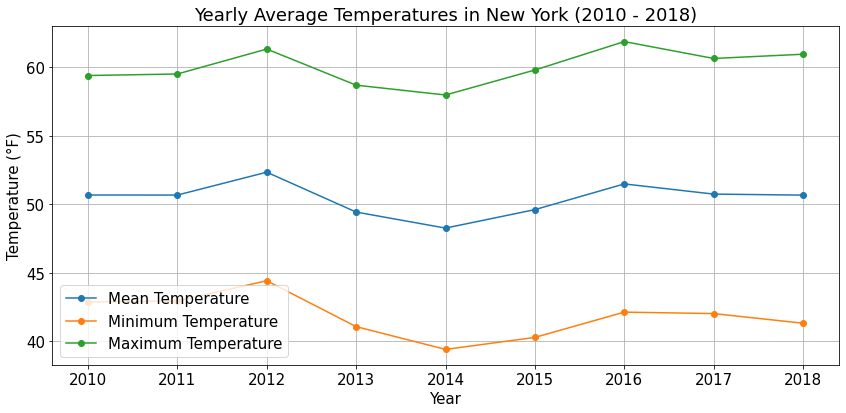

In [17]:
# Calculate yearly average temperatures
yearly_temps = weather_data.groupby('Year').agg({'MeanTemp': 'mean', 'MinTemp': 'mean', 'MaxTemp': 'mean'})

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(yearly_temps.index, yearly_temps['MeanTemp'], label='Mean Temperature', marker='o')
plt.plot(yearly_temps.index, yearly_temps['MinTemp'], label='Minimum Temperature', marker='o')
plt.plot(yearly_temps.index, yearly_temps['MaxTemp'], label='Maximum Temperature', marker='o')

plt.title('Yearly Average Temperatures in New York (2010 - 2018)')
plt.xlabel('Year')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


The plot illustrates the yearly average temperatures (mean, minimum, and maximum) in New York from 2010 through 2018. Each line represents the trend for mean, minimum, and maximum temperatures, providing insight into how the climate has varied over these years.

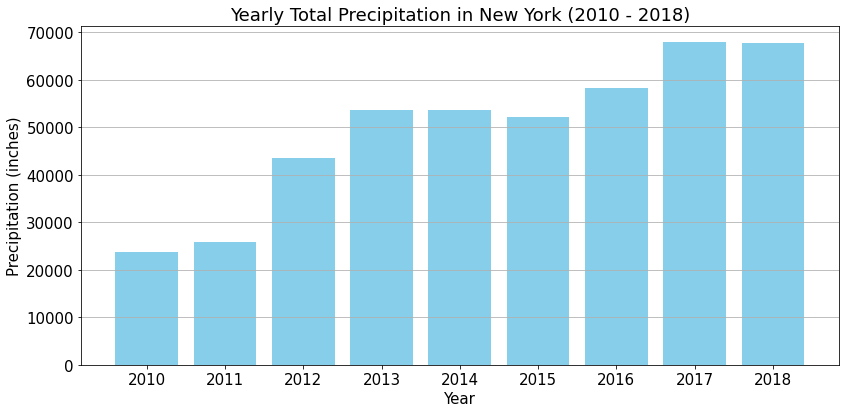

In [18]:
# Calculate yearly total precipitation
yearly_precipitation = weather_data.groupby('Year')['Percipitation'].sum()

# Plotting the yearly total precipitation
plt.figure(figsize=(12, 6))
plt.bar(yearly_precipitation.index, yearly_precipitation.values, color='skyblue')
plt.title('Yearly Total Precipitation in New York (2010 - 2018)')
plt.xlabel('Year')
plt.ylabel('Precipitation (inches)')
plt.xticks(yearly_precipitation.index)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Looks like NY has received increased amounts of precipitation over the years. 

The bar chart displays the yearly total precipitation in New York from 2010 through 2018. This visualization helps identify the years with higher or lower amounts of precipitation, indicating variability in rainfall and snowfall over the years.

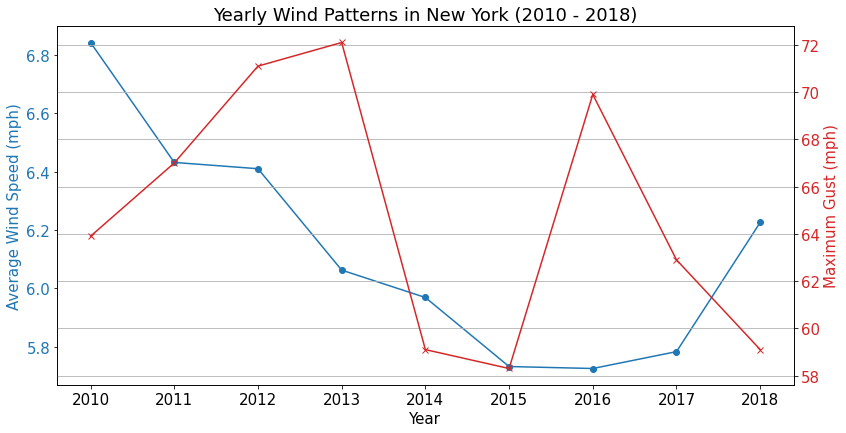

In [19]:
# Calculate yearly average wind speed and maximum gust
yearly_wind = weather_data.groupby('Year').agg({'WindSpeed': 'mean', 'Gust': 'max'})

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Wind Speed (mph)', color=color)
ax1.plot(yearly_wind.index, yearly_wind['WindSpeed'], label='Average Wind Speed', color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Maximum Gust (mph)', color=color)  # we already handled the x-label with ax1
ax2.plot(yearly_wind.index, yearly_wind['Gust'], label='Maximum Gust', color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Yearly Wind Patterns in New York (2010 - 2018)')
plt.grid(True)
plt.show()


The chart above illustrates the yearly wind patterns in New York from 2010 through 2018, showing both the average wind speed (in mph) and the maximum gusts recorded each year. The blue line represents the average wind speed, while the red line indicates the maximum gust speeds.

This visualization provides insight into the general wind conditions and highlights years with particularly strong gusts, reflecting the variability of wind intensity over the observed period.

Given the analyses conducted so far on the weather dataset, including temperature trends, precipitation patterns, and wind patterns, another insightful exploration could involve examining the relationship between weather conditions and specific weather events, such as days with significant precipitation or high wind speeds, and their occurrence over the years.

For this next step, let's focus on:

1. Days with Significant Precipitation: Identify and visualize the number of days per year with precipitation exceeding a certain threshold, indicating heavy rainfall or significant snowfall events.\
2. Days with High Wind Speeds: Analyze and plot the number of days per year with wind speeds exceeding a threshold, highlighting windy conditions or storms.

#### Days with Significant Precipitation
Let's define "significant precipitation" as days with precipitation amounts exceeding 0.5 inches, which often indicates heavy rainfall or significant snowfall events. We'll count these days per year to see any trends in their frequency over time.



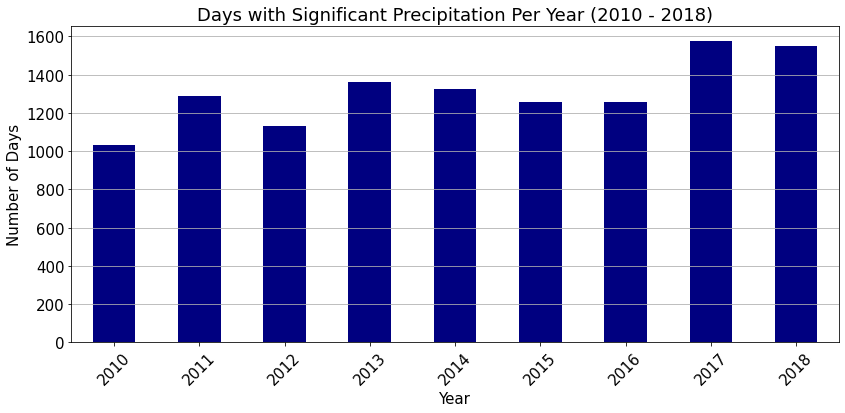

In [20]:
# Define a threshold for significant precipitation (in inches)
significant_precipitation_threshold = 0.5

# Filter the dataset for days with precipitation exceeding the threshold
significant_precip_days = weather_data[weather_data['Percipitation'] > significant_precipitation_threshold]

# Count the number of significant precipitation days per year
significant_precip_days_per_year = significant_precip_days.groupby('Year').size()

# Plotting
plt.figure(figsize=(12, 6))
significant_precip_days_per_year.plot(kind='bar', color='navy')
plt.title('Days with Significant Precipitation Per Year (2010 - 2018)')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


The bar chart illustrates the number of days per year with significant precipitation (more than 0.5 inches) in New York from 2010 through 2018. This visualization helps identify years with higher frequencies of heavy rainfall or significant snowfall events, providing insight into variations in extreme weather conditions over the observed period.

#### Days with High Wind Speeds
Next, let's define "high wind speeds" as days with wind speeds exceeding 20 mph, which can indicate windy conditions or the presence of storms. We'll count these days per year to observe any trends in their occurrence over time. 

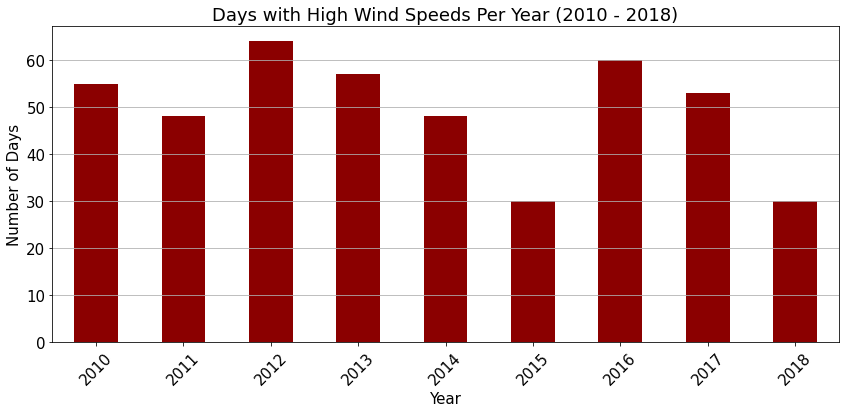

In [21]:
# Define a threshold for high wind speeds (in mph)
high_wind_speed_threshold = 20

# Filter the dataset for days with wind speeds exceeding the threshold
high_wind_days = weather_data[weather_data['WindSpeed'] > high_wind_speed_threshold]

# Count the number of high wind speed days per year
high_wind_days_per_year = high_wind_days.groupby('Year').size()

# Plotting
plt.figure(figsize=(12, 6))
high_wind_days_per_year.plot(kind='bar', color='darkred')
plt.title('Days with High Wind Speeds Per Year (2010 - 2018)')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


Now that we've taken a quick look at patterns in the two sets of data, we can get into combining the two sets of data, understand correlations and eventually build predictive models to predict number of requests in the next 7 days - as per the original problem description. 

First we'll look at monthly trends and then jump into daily trends. 

In [22]:
requests['Year-Month'] = requests['Created Date'].dt.to_period('M')

# Aggregate 311 requests data to monthly counts
monthly_requests_counts = requests.groupby('Year-Month').size().reset_index(name='Request Count')

# For weather data, ensure we're working with the correct aggregation
weather_data['Year-Month'] = pd.to_datetime(weather_data['Year'].astype(str) + '-' + weather_data['Month'].astype(str)).dt.to_period('M')
monthly_weather_agg = weather_data.groupby('Year-Month').agg({
    'MeanTemp': 'mean',
    'Precipitation': 'sum',  # Total monthly precipitation
    'WindSpeed': 'mean'
}).reset_index()

# Merging the aggregated monthly 311 requests data with the aggregated monthly weather data
combined_data = pd.merge(monthly_requests_counts, monthly_weather_agg, on='Year-Month', how='inner')

combined_data



Year-Month  Request Count   MeanTemp  Precipitation  WindSpeed
0     2016-01          27533  28.584615        4957.13   6.978940
1     2016-02          25929  30.937171        5533.10   7.109321
2     2016-03          25768  41.081076        3472.01   6.330385
3     2016-04          24189  44.987842        3785.85   5.931524
4     2016-05          26538  57.836143        4990.16   4.737225
5     2016-06          27325  67.054676        3080.51   5.218597
6     2016-07          26473  73.546323        4815.82   4.880183
7     2016-08          26253  74.225903        4328.30   4.655289
8     2016-09          24831  66.377806        3786.86   4.706922
9     2016-10          26265  53.851048        5964.09   5.575897
10    2016-11          24715  44.245788        5092.11   5.836722
11    2016-12          26889  32.432331        8321.45   6.895344
12    2017-01          27095  32.041296        7810.84   6.382980
13    2017-02          23569  34.722659        5779.87   6.708039
14    2017-03          27168  32.805155        4806.76   7.530943
15    2017-04          25453  51.249770        3372.79   6.358111
16    2017-05          27708  56.488759        5394.58   5.947153
17    2017-06          28697  66.863906        6261.59   5.374573
18    2017-07          27487  71.148470        5357.80   4.514880
19    2017-08          26542  68.922875        4826.33   4.363191
20    2017-09          27407  65.132444        3388.15   4.202112
21    2017-10          28675  58.264048        5589.10   5.715326
22    2017-11          28320  41.182797        7389.25   6.249836
23    2017-12          28731  28.129382        7862.71   6.140497
24    2018-01          33165  25.227154        6588.54   6.973660
25    2018-02          25086  33.854462        7815.88   6.044318
26    2018-03          29350  33.732254        7198.82   7.106480
27    2018-04          27842  41.150684        7921.50   6.876334
28    2018-05          30279  62.291871        6491.86   5.966215
29    2018-06          30653  66.491081        5613.94   5.679262
30    2018-07          31126  73.705743        4744.03   5.418868
31    2018-08          31424  73.147894        6476.89   5.233447
32    2018-09          30107  66.046449        4581.64   5.227027
33    2018-10          32840  51.298348        7255.80   6.661797
34    2018-11          30430  44.236401        3092.24   7.176380

As a first pass, let's look at if there's any correlation between precipitation and request count, and wind speed and request count. 

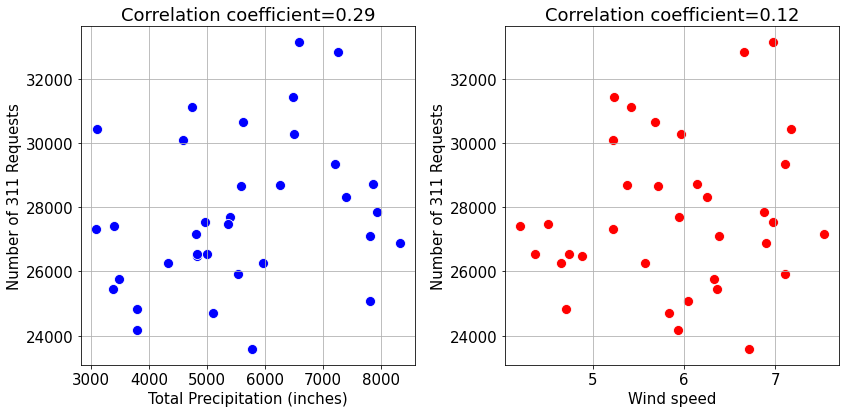

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'combined_data' is your merged dataset with weather and 311 requests data
fig, axs = plt.subplots(figsize=(12, 6), nrows=1, ncols=2)

sns.scatterplot(x='Precipitation', y='Request Count', data=combined_data, color='b', s=100, ax=axs[0])
requests_precipitation_corr_coef = combined_data['Request Count'].corr(combined_data['Precipitation'], method='spearman')

axs[0].set_title(f'Correlation coefficient={requests_precipitation_corr_coef:.2f}')
axs[0].set_xlabel('Total Precipitation (inches)')
axs[0].set_ylabel('Number of 311 Requests')
axs[0].grid()

sns.scatterplot(x='WindSpeed', y='Request Count', data=combined_data, color='r', s=100, ax=axs[1])
requests_windspeed_corr_coef = combined_data['Request Count'].corr(combined_data['WindSpeed'], method='spearman')

axs[1].set_title(f'Correlation coefficient={requests_windspeed_corr_coef:.2f}')
axs[1].set_xlabel('Wind speed')
axs[1].set_ylabel('Number of 311 Requests')
axs[1].grid()


plt.tight_layout()

We see a weak correlation between precipitation and request count, and almost no correlation between wind speed and request count. 

Now, we see some requests with the word heat in them. We can check if there is any correlation between heat-related requests and temperatures.

In [24]:
# Filter the 311 dataset for heating complaints
heating_complaints = requests[requests['Complaint Type'].str.contains('Heat', case=False, na=False)]

# Aggregate the count of heating complaints by 'Year-Month'
heating_complaints_monthly = heating_complaints.groupby('Year-Month').size().reset_index(name='Heating Complaints Count')

# Ensure 'Year-Month' is in a plottable format (if necessary, convert to datetime)
heating_complaints_monthly['Year-Month-Datetime'] = heating_complaints_monthly['Year-Month'].dt.to_timestamp()
heating_complaints_monthly

combined_data_with_heating = pd.merge(monthly_weather_agg, heating_complaints_monthly, on='Year-Month', how='inner')

combined_data_with_heating


Year-Month   MeanTemp  Precipitation  WindSpeed  Heating Complaints Count  \
0     2016-01  28.584615        4957.13   6.978940                      6339   
1     2016-02  30.937171        5533.10   7.109321                      5043   
2     2016-03  41.081076        3472.01   6.330385                      2223   
3     2016-04  44.987842        3785.85   5.931524                      1668   
4     2016-05  57.836143        4990.16   4.737225                      1023   
5     2016-06  67.054676        3080.51   5.218597                       312   
6     2016-07  73.546323        4815.82   4.880183                       290   
7     2016-08  74.225903        4328.30   4.655289                       325   
8     2016-09  66.377806        3786.86   4.706922                       372   
9     2016-10  53.851048        5964.09   5.575897                      2946   
10    2016-11  44.245788        5092.11   5.836722                      3702   
11    2016-12  32.432331        8321.45   6.895344                      5633   
12    2017-01  32.041296        7810.84   6.382980                      4456   
13    2017-02  34.722659        5779.87   6.708039                      3126   
14    2017-03  32.805155        4806.76   7.530943                      4047   
15    2017-04  51.249770        3372.79   6.358111                      1400   
16    2017-05  56.488759        5394.58   5.947153                       987   
17    2017-06  66.863906        6261.59   5.374573                       443   
18    2017-07  71.148470        5357.80   4.514880                       323   
19    2017-08  68.922875        4826.33   4.363191                       347   
20    2017-09  65.132444        3388.15   4.202112                       358   
21    2017-10  58.264048        5589.10   5.715326                      1344   
22    2017-11  41.182797        7389.25   6.249836                      4925   
23    2017-12  28.129382        7862.71   6.140497                      6388   
24    2018-01  25.227154        6588.54   6.973660                      7321   
25    2018-02  33.854462        7815.88   6.044318                      2550   
26    2018-03  33.732254        7198.82   7.106480                      3186   
27    2018-04  41.150684        7921.50   6.876334                      2019   
28    2018-05  62.291871        6491.86   5.966215                       657   
29    2018-06  66.491081        5613.94   5.679262                       427   
30    2018-07  73.705743        4744.03   5.418868                       356   
31    2018-08  73.147894        6476.89   5.233447                       351   
32    2018-09  66.046449        4581.64   5.227027                       346   
33    2018-10  51.298348        7255.80   6.661797                      3547   
34    2018-11  44.236401        3092.24   7.176380                      4774   

   Year-Month-Datetime  
0           2016-01-01  
1           2016-02-01  
2           2016-03-01  
3           2016-04-01  
4           2016-05-01  
5           2016-06-01  
6           2016-07-01  
7           2016-08-01  
8           2016-09-01  
9           2016-10-01  
10          2016-11-01  
11          2016-12-01  
12          2017-01-01  
13          2017-02-01  
14          2017-03-01  
15          2017-04-01  
16          2017-05-01  
17          2017-06-01  
18          2017-07-01  
19          2017-08-01  
20          2017-09-01  
21          2017-10-01  
22          2017-11-01  
23          2017-12-01  
24          2018-01-01  
25          2018-02-01  
26          2018-03-01  
27          2018-04-01  
28          2018-05-01  
29          2018-06-01  
30          2018-07-01  
31          2018-08-01  
32          2018-09-01  
33          2018-10-01  
34          2018-11-01

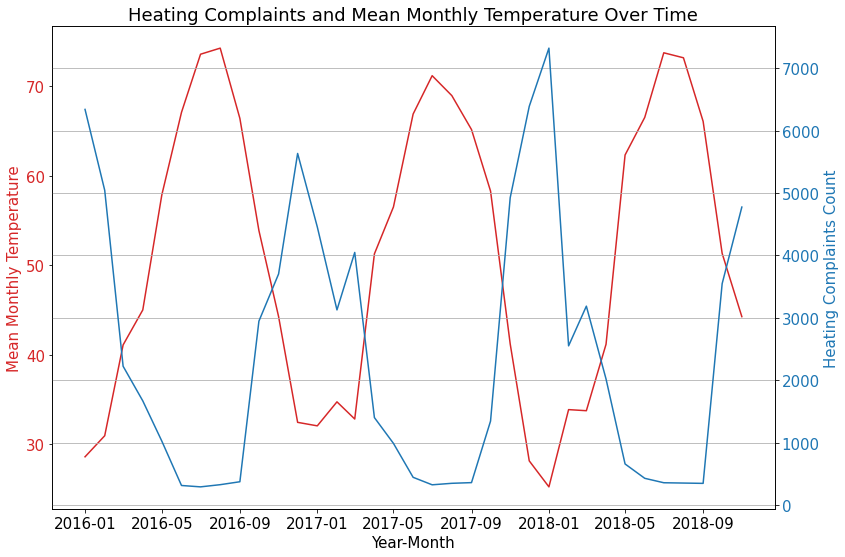

In [25]:
fig, ax1 = plt.subplots(figsize=(12,8))

color = 'tab:red'
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Mean Monthly Temperature', color=color)
ax1.plot(combined_data_with_heating['Year-Month-Datetime'], combined_data_with_heating['MeanTemp'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Heating Complaints Count', color=color)
ax2.plot(combined_data_with_heating['Year-Month-Datetime'], combined_data_with_heating['Heating Complaints Count'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Heating Complaints and Mean Monthly Temperature Over Time')
plt.xticks(rotation=45)
fig.tight_layout()
plt.grid()
plt.show()


Looks like the heat-related complaints are related to problems with the heaters at home - as these are peaking in winter times. This is unexpected, we can see below that there is a strong negative correlation between the two sets of data. 

In [26]:
combined_data_with_heating['MeanTemp'].corr(combined_data_with_heating['Heating Complaints Count'], method='spearman')


-0.930812324929972

Now we'll move to daily trends, look at broad correlations and then get into modeling.

In [27]:
# Convert 'Created Date' to datetime format, if not already done
requests['Created Date'] = pd.to_datetime(requests['Created Date'])

# Create a new column for the date (without time)
requests['Date'] = requests['Created Date'].dt.date

# Group by the new 'Date' column and count the number of requests per day
daily_requests = requests.groupby('Date').size().reset_index(name='Request Count')

# Assuming 'weather_data' has columns for 'Year', 'Month', and 'Day'
weather_data['Date'] = pd.to_datetime(weather_data[['Year', 'Month', 'Day']]).dt.date

daily_weather_agg = weather_data.groupby('Date').agg({
    'MeanTemp': 'mean',  # Daily average mean temperature
    'MaxTemp': 'mean',  # Daily average maximum temperature
    'MinTemp': 'mean',  # Daily average minimum temperature
    'Precipitation': 'sum',  # Total daily precipitation
    'WindSpeed': 'mean',  # Daily average wind speed
    'SnowDepth': 'max',  # Maximum snow depth for the day
    'Gust': 'max',  # Maximum gust speed for the day
    'Rain':'mean', 
    'MaxSustainedWind': 'mean',
    'SnowDepth':'sum', 
    'SnowIce':'mean'
    # Add any other relevant metrics you wish to include
}).reset_index()

daily_weather_agg['Rain'] = np.round(daily_weather_agg['Rain'])
daily_weather_agg['SnowIce'] = np.round(daily_weather_agg['SnowIce'])

# Merge the daily 311 requests with the daily weather data
combined_data = pd.merge(daily_requests, daily_weather_agg, on='Date', how='inner')

combined_data = combined_data.fillna(0)

combined_data

Date  Request Count   MeanTemp    MaxTemp    MinTemp  \
0     2016-01-01            568  34.508333  39.531250  31.058333   
1     2016-01-02            610  31.206122  35.873469  27.473469   
2     2016-01-03            645  33.993750  39.083333  26.956250   
3     2016-01-04           1177  19.645833  35.456250  10.606250   
4     2016-01-05           1601  12.697917  26.497917   4.933333   
...          ...            ...        ...        ...        ...   
1042  2018-11-08           1092  44.509756  54.924390  38.534146   
1043  2018-11-09           1020  37.921951  47.680488  31.290244   
1044  2018-11-10            867  38.634146  44.358537  29.951220   
1045  2018-11-11            814  34.417073  43.041463  28.590244   
1046  2018-11-12            941  30.847368  33.242105  28.228947   

      Precipitation  WindSpeed  SnowDepth  Gust  Rain  MaxSustainedWind  \
0            302.12   7.821739        4.8  33.0   0.0         15.271795   
1            200.69   7.631915        3.2  31.1   0.0         14.525000   
2            200.30   8.497826        1.2  34.0   0.0         16.974359   
3            300.59   8.778261        4.4  32.1   0.0         15.941026   
4            100.10   5.439130        3.2  35.0   0.0         12.584615   
...             ...        ...        ...   ...   ...               ...   
1042           0.18   7.450000        0.0  31.1   0.0         12.907895   
1043         500.04   5.415789        1.2  27.0   1.0         12.531579   
1044         425.03  11.852632        0.0  42.9   1.0         22.513158   
1045         101.35   7.568421        0.0  34.0   0.0         13.715789   
1046           0.07   2.085714        0.0   0.0   0.0          4.916667   

      SnowIce  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
...       ...  
1042      0.0  
1043      1.0  
1044      1.0  
1045      0.0  
1046      0.0  

[1047 rows x 12 columns]

In [28]:
combined_data.columns

Index(['Date', 'Request Count', 'MeanTemp', 'MaxTemp', 'MinTemp',
       'Precipitation', 'WindSpeed', 'SnowDepth', 'Gust', 'Rain',
       'MaxSustainedWind', 'SnowIce'],
      dtype='object')

We have included all the available numerical columns in the weather dataset above, and aggregated at the level of each day. Below, we can look at the correlations between these high-level metrics and the corresponding request counts. 

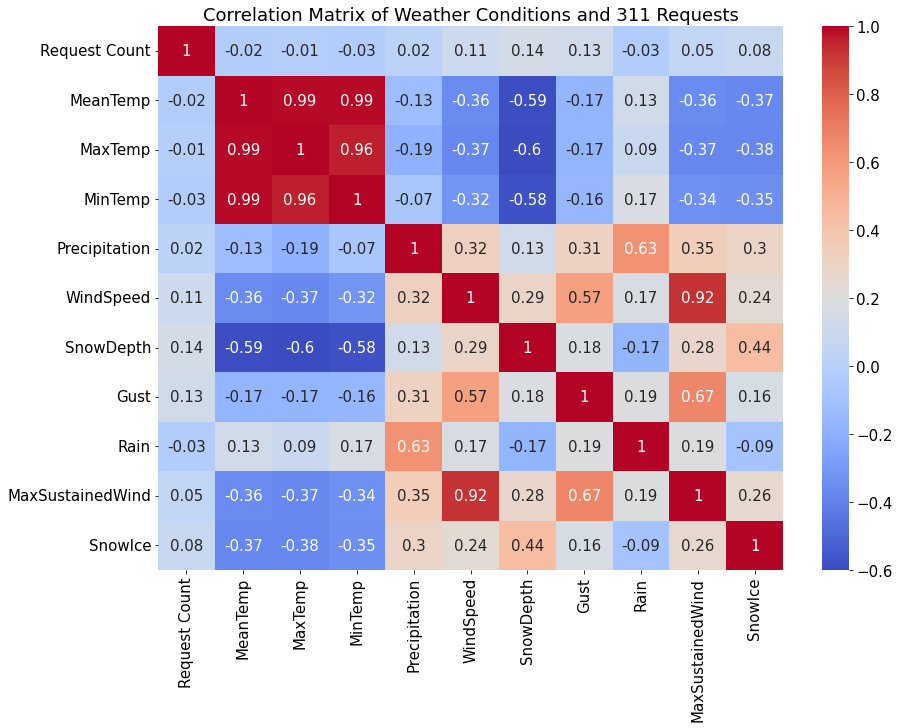

In [29]:
# Assuming 'combined_data' includes various weather metrics and types of 311 requests
fig, ax = plt.subplots(figsize=(14,10))

correlation_matrix = np.round(combined_data[['Request Count','MeanTemp', 'MaxTemp', 'MinTemp','Precipitation','WindSpeed', 'SnowDepth', 'Gust', 'Rain',
       'MaxSustainedWind', 'SnowIce',]].corr(),2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Weather Conditions and 311 Requests')
plt.show()

In general, we are seeing low correlations across the board with request count. The most correlated features with request count are `SnowDepth` and `Gust`. 

#### Building the predictive model

Below, we will start working towards the predictive model - 

* The eventual goal is to predict the daily 311 inbound calls for the next 7 days. 
* We will do this in several steps. 
* The last data in the combined dataset is 2018-11-12 - this is where the weather data ends. So, we will first build a quick model to forecast the weather metrics for the next 7 days. To build a quick and reliable forecast, we will use an ARIMA model from python's `statsmodel` library. 
* Using these forecasted numbers, we will train a couple of regression models. 

In [30]:
from statsmodels.tsa.arima.model import ARIMA
# Ignore all warnings
warnings.filterwarnings("ignore")

# Assuming 'weather_data' is your historical DataFrame indexed by datetime
last_date = pd.to_datetime(combined_data.Date.max())
forecast_start_date = last_date + pd.Timedelta(days=1)

# Define the forecast period length (e.g., 7 days)
forecast_period = 7

# Create a date range for the forecast period
forecast_dates = pd.date_range(start=forecast_start_date, periods=forecast_period, freq='D')


def forecast_arima(series, order=(1,1,1), steps=7):
    """
    Forecast the next 'steps' points in the series using ARIMA.
    
    Parameters:
    - series: pd.Series, the time series data to forecast.
    - order: tuple, the (p, d, q) order of the ARIMA model.
    - steps: int, the number of steps to forecast ahead.
    
    Returns:
    - forecast: The forecasted values as a pd.Series.
    """
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast

weather_metrics = ['MeanTemp', 'MaxTemp', 'MinTemp', 'Percipitation', 'WindSpeed', 'SnowDepth', 'Gust','MaxSustainedWind']
forecast_results = {}

# Assuming 'weather_data' is your DataFrame and it's indexed by a datetime index
for metric in weather_metrics:
    series = weather_data[metric].dropna()  # Drop NA values for simplicity
    forecast = forecast_arima(series, order=(1,1,1), steps=7)  # You may need to adjust the order based on the series
    forecast.index = forecast_dates
    forecast_results[metric] = forecast


forecast_results


{'MeanTemp': 2018-11-13    55.440374
 2018-11-14    57.587756
 2018-11-15    58.701484
 2018-11-16    59.279113
 2018-11-17    59.578697
 2018-11-18    59.734074
 2018-11-19    59.814660
 Freq: D, Name: predicted_mean, dtype: float64,
 'MaxTemp': 2018-11-13    67.055139
 2018-11-14    69.345608
 2018-11-15    70.523180
 2018-11-16    71.128591
 2018-11-17    71.439844
 2018-11-18    71.599865
 2018-11-19    71.682135
 Freq: D, Name: predicted_mean, dtype: float64,
 'MinTemp': 2018-11-13    45.999286
 2018-11-14    48.429294
 2018-11-15    49.522946
 2018-11-16    50.015156
 2018-11-17    50.236681
 2018-11-18    50.336380
 2018-11-19    50.381251
 Freq: D, Name: predicted_mean, dtype: float64,
 'Percipitation': 2018-11-13    0.090900
 2018-11-14    0.101711
 2018-11-15    0.102996
 2018-11-16    0.103149
 2018-11-17    0.103167
 2018-11-18    0.103169
 2018-11-19    0.103170
 Freq: D, Name: predicted_mean, dtype: float64,
 'WindSpeed': 2018-11-13    6.438956
 2018-11-14    6.608417
 20

We now have the weather metrics forecasted for the next 7 days. We'll use this as input in the next few steps to build our predictive model. 

Please note the following important considerations during the model building process

* We will first separate the date field into multiple components - such as DayOfWeek, Year, Month, Quarter and Day - this will help us add more granularity into our feature set. 
* We will one-hot encode the categorical features - and be sure to use the same attribute set to encode the test set as well (ie, the forecasted weather data). 
* When we split the data into train and test sets, we should be mindful to split the data not randomly, but in chronological order, since weather patterns are not random, but are auto-correlated.
* We will measure the performance of the regression models by MAE (mean absolute error) and RMSE (root mean squared error).
* We will compare a simple Linear Regression model with a couple of ensemble models - Random Forest and XGboost. 

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Extract day of the week as a feature
combined_data['Date'] = pd.to_datetime(combined_data['Date'])
combined_data['DayOfWeek'] = combined_data['Date'].dt.dayofweek
combined_data['Year'] = combined_data['Date'].dt.year
combined_data['Month'] = combined_data['Date'].dt.month
combined_data['Day'] = combined_data['Date'].dt.day
combined_data['Quarter'] = combined_data['Date'].dt.quarter

combined_data = combined_data.sort_values(by='Date')

# Selecting features and target variable for simplicity
features = ['DayOfWeek','Year','Month','Day','Quarter','MeanTemp','MaxTemp', 'MinTemp', 'Percipitation', 'WindSpeed', 'SnowDepth', 'Gust', 'DayOfWeek','MaxSustainedWind']  # Example features
target = 'Request Count'

categorical_features = ['DayOfWeek','Year','Month','Day','Quarter']

# OneHotEncoding the categorical features
encoded_data = pd.get_dummies(combined_data, columns=categorical_features).drop(columns='Date')

X = encoded_data.drop(columns=target)
y = encoded_data[target]

# Split the data into training and testing sets in chronological order
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the testing set
predictions = lr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

# Assuming forecast_results is a dictionary containing forecasts for each metric
forecast_data = pd.DataFrame(index=forecast_dates)

for metric, forecast in forecast_results.items():
    forecast_data[metric] = forecast

forecast_data = pd.DataFrame(index=forecast_dates)

for metric, forecast in forecast_results.items():
    forecast_data[metric] = forecast

forecast_data['DayOfWeek'] = forecast_data.index.dayofweek
forecast_data['Year'] = forecast_data.index.year
forecast_data['Month'] = forecast_data.index.month
forecast_data['Day'] = forecast_data.index.day
forecast_data['Quarter'] = forecast_data.index.quarter

test_encoded = pd.get_dummies(forecast_data, columns=categorical_features)

test_encoded_aligned = test_encoded.reindex(columns = X.columns, fill_value=0)

request_count_predictions_lr = lr_model.predict(test_encoded_aligned).astype(int)

forecast_lr = pd.DataFrame(request_count_predictions_lr, index=forecast_dates, columns=['Forecast'])
forecast_lr


MAE: 88.73617001488095
RMSE: 109.58523427178193


Forecast
2018-11-13      1033
2018-11-14      1000
2018-11-15      1000
2018-11-16       977
2018-11-17       810
2018-11-18       732
2018-11-19      1007

In [32]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=200, random_state=42, max_depth = 10)  # You can adjust these parameters

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the testing set
predictions = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

request_count_predictions_rf = rf_model.predict(test_encoded_aligned).astype(int)
forecast_rf = pd.DataFrame(request_count_predictions_rf, index=forecast_dates, columns=['Forecast'])
forecast_rf


MAE: 81.4992087381232
RMSE: 107.48092774985207


Forecast
2018-11-13      1058
2018-11-14      1060
2018-11-15      1064
2018-11-16      1032
2018-11-17       814
2018-11-18       739
2018-11-19      1073

In [33]:
import xgboost as xgb

# Initialize the XGBRegressor
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', 
                             colsample_bytree = 0.3, 
                             learning_rate = 0.1,
                             max_depth = 5, 
                             alpha = 10, 
                             n_estimators = 200)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the testing set
predictions = xgb_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

request_count_predictions_xgb = xgb_model.predict(test_encoded_aligned).astype(int)
forecast_xgb = pd.DataFrame(request_count_predictions_xgb, index=forecast_dates, columns=['Forecast'])
forecast_xgb


MAE: 84.07577136811756
RMSE: 110.15755604624901


Forecast
2018-11-13      1049
2018-11-14      1011
2018-11-15      1011
2018-11-16       985
2018-11-17       827
2018-11-18       758
2018-11-19      1013

Now, we will visualize the predictions. Since the original dataset also has data for these dates (2018-11-13 through 2018-11-19), we can compare the predictions from the models to this ground truth. 

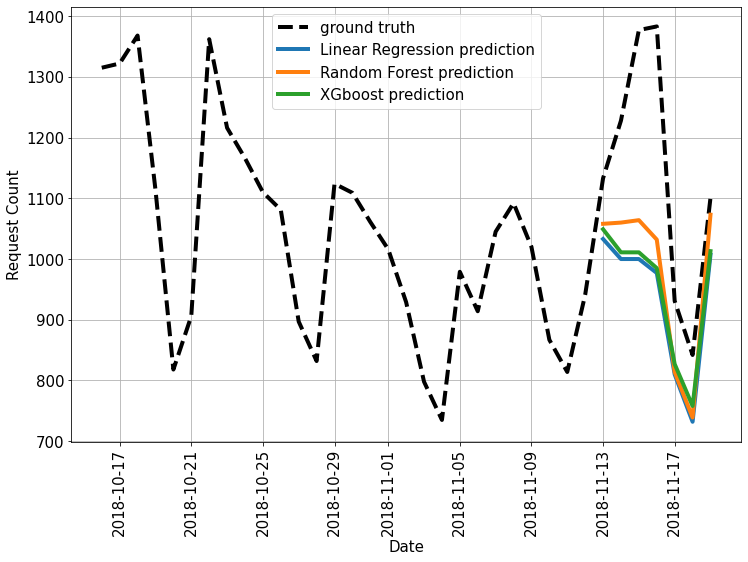

In [34]:
fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(data=daily_requests.loc[(pd.to_datetime(daily_requests['Date']) > pd.to_datetime('2018-10-15')) & 
                                     (pd.to_datetime(daily_requests['Date']) <= pd.to_datetime(test_encoded_aligned.index[-1]))], 
                                     x='Date', y='Request Count', color='k', label='ground truth', lw=4, linestyle='--')

sns.lineplot(x=forecast_lr.index, y=forecast_lr['Forecast'], label='Linear Regression prediction', lw=4)
sns.lineplot(x=forecast_rf.index, y=forecast_rf['Forecast'],  label='Random Forest prediction', lw=4)
sns.lineplot(x=forecast_xgb.index, y=forecast_xgb['Forecast'], label='XGboost prediction', lw=4)
plt.setp(ax.get_xticklabels(), rotation=90, ha='center')

ax.legend()

ax.grid()

We see that all 3 models performed reasonably well - with Random Forest performing the best. We aren't capturing the large spikes in the request counts (as seen on 2018-11-16), but otherwise, our predictions aren't too bad. 

## Summary and Conclusion

We analyzed the 311 requests data from NY, looked at various attributes and patterns in the data. While there are numerous types of complaints/requests in the dataset, a subset of these requests could be influenced by weather patterns. We eventually looked at the weather dataset for the same time period, and then used the weather features to predict the number of daily requests for the next 7 days. We do this by joining the two datasets, creating multiple features from the available data to inform different regression models. Following are the main takeaways 

* the input dataset of requests was very large - we tackle this by randomly sampling 1M rows of data spanning the entire time period. 
* we corrected for erroneous values in the data, such as negative resolution times. 
* given more time, we could have dedicated more efforts towards digging deeper into the datasets to understand more nuanced patterns. For instance, a better understanding about the different types of complaints would enable us to develop a conceptual understanding about which types of requests are affected by weather. 
* along the same lines, we could have also used other publicly available datasets to improve our predictions. For instance, one of the most frequent requests was "Noise - Residential"; one could expect some correlations between the prevalence of this request and proximity to urban areas, since one would residential noise complaints to be more prevalent in apartment buildings rather than single-family houses. And this applies for other types of noise complaints as well. 
* there are a number of other types of complaints which are related to living conditions - such as unsanitary conditions, construction-related issues etc, where we can again benefit from housing-quality related data. 
* we could also expect improved accuracies by running the above models at more specific locations - ie, using local weather patterns to predict the request count for the borough or some approximated lat/long combination. This is possible since we have lat/long information in both datasets. 
* finally, given more time, we could've continued to improve the model parameters - through hyperparameter tuning, and eventually getting into more complex models. Overall, this was a fun exercise. 
